In [1]:
import sys
sys.path.append('..')

In [2]:
import planetengine
import modelscripts

In [5]:
initial = {
    'temperatureField': planetengine.initials.sinusoidal.IC(),
    'materialVar': planetengine.initials.extents.IC(([1], planetengine.shapes.trapezoid()))
    }

In [4]:
system = modelscripts.MS98X_systemscript.build()

In [6]:
planetengine.initials.apply(initial, system)

In [9]:
system.solve()

In [7]:
from planetengine import quickShow

Fitted 3 variables to the figure.



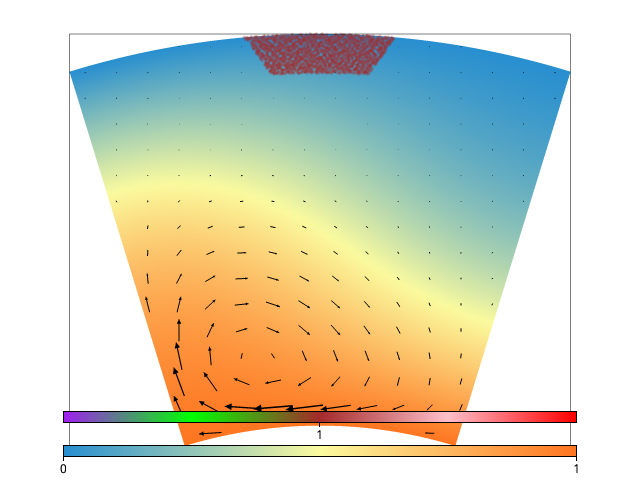

In [10]:
quickShow(system.temperatureField, system.velocityField, system.materialVar)

In [11]:
from underworld import function as fn

In [31]:
angMag = fn.math.dot(system.mesh.unitvec_theta_Fn, system.velocityField)
angVec = angMag * system.mesh.unitvec_theta_Fn
radMag = fn.math.dot(system.mesh.unitvec_r_Fn, system.velocityField)
radVec = radMag * system.mesh.unitvec_r_Fn
newVelFn = radVec + angVec

In [32]:
newVelField = system.mesh.add_variable(2)

In [33]:
newVelField.data[:] = newVelFn.evaluate(system.mesh)

In [34]:
newVelField.data / system.velocityField.data

array([[  5.00000076,  11.0474155 ],
       [  8.23148402,  10.2079348 ],
       [  8.86419228,  10.12297942],
       ..., 
       [  4.8183675 ,  11.13534778],
       [  4.9115834 ,  11.08923382],
       [  4.99999998,  11.04741586]])

Fitted 1 variables to the figure.



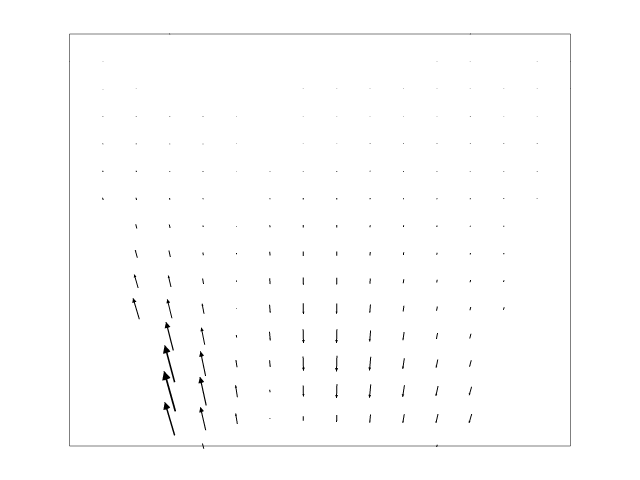

In [35]:
quickShow(newVelField)